## **CONNECTING TO DRIVE, IMPORTNG PACKAGES AND DATASET**

In [1]:
#connect to google drive
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Packages imported successfully')

Packages imported successfully


In [4]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/Life_Expectancy_Data.csv')
print('Dataset imported successfully')

Dataset imported successfully


# **DATA EXPLORATION**

In [5]:
#load top 5 rows of the dataset
df.head(5)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#explore the columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
#explore the shape
df.shape
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns')

This dataset has 1649 rows and 22 columns


In [8]:
#explore necessary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [9]:
#checking for null values
null_values = df.isnull().sum()

for missing_values in null_values.index:
    print(f'{missing_values} has {null_values[missing_values]} missing values\n')

Country has 0 missing values

Year has 0 missing values

Status has 0 missing values

Life expectancy  has 0 missing values

Adult Mortality has 0 missing values

infant deaths has 0 missing values

Alcohol has 0 missing values

percentage expenditure has 0 missing values

Hepatitis B has 0 missing values

Measles  has 0 missing values

 BMI  has 0 missing values

under-five deaths  has 0 missing values

Polio has 0 missing values

Total expenditure has 0 missing values

Diphtheria  has 0 missing values

 HIV/AIDS has 0 missing values

GDP has 0 missing values

Population has 0 missing values

 thinness  1-19 years has 0 missing values

 thinness 5-9 years has 0 missing values

Income composition of resources has 0 missing values

Schooling has 0 missing values



In [10]:
#examine the dataset for duplicated values
df.duplicated().sum()

0

In [11]:
#identify categorical columns
df.select_dtypes(include='object').columns

Index(['Country', 'Status'], dtype='object')

In [12]:
#identify numeric columns
df.select_dtypes(np.number).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
#determine number of outliers in each column
def outliers_numbers():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]


num_columns = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for col in num_columns:
    print(f'Number of outliers in {col}: {outliers_numbers()}\n')

Number of outliers in Year: 0

Number of outliers in Life expectancy : 39

Number of outliers in Adult Mortality: 54

Number of outliers in infant deaths: 199

Number of outliers in Alcohol: 2

Number of outliers in percentage expenditure: 187

Number of outliers in Hepatitis B: 165

Number of outliers in Measles : 297

Number of outliers in  BMI : 0

Number of outliers in under-five deaths : 222

Number of outliers in Polio: 142

Number of outliers in Total expenditure: 7

Number of outliers in Diphtheria : 134

Number of outliers in  HIV/AIDS: 299

Number of outliers in GDP: 208

Number of outliers in Population: 233

Number of outliers in  thinness  1-19 years: 77

Number of outliers in  thinness 5-9 years: 78

Number of outliers in Income composition of resources: 48

Number of outliers in Schooling: 16



There are several outliers in this dataset. This might be because it includes observations of both developing and developed countries. These values are expected to be far apart.

In [14]:
#creating a table for better view of number of outliers of each column

outliers_table = []

num_columns = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

def outliers_numbers():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]




for col in num_columns:
    outliers_table.append([col, outliers_numbers()])

outliers_table
pd.DataFrame(outliers_table, columns=['Column', 'Number of Outliers']).sort_values(ascending=False, by = ('Number of Outliers'))

,Column,Number of Outliers
13,HIV/AIDS,299
7,Measles,297
15,Population,233
9,under-five deaths,222
14,GDP,208
3,infant deaths,199
5,percentage expenditure,187
6,Hepatitis B,165
10,Polio,142
12,Diphtheria,134


Year and BMI has no outlier

In [15]:
#determine upper and lower bound
def lower_bound():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound


def upper_bound():
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound




num_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

for col in num_columns:
    print(f'{col} outliers are less than {lower_bound()} and greater than {upper_bound()}\n')

Life expectancy  outliers are less than 48.500000000000014 and greater than 90.89999999999999

Adult Mortality outliers are less than -148.0 and greater than 452.0

infant deaths outliers are less than -30.5 and greater than 53.5

Alcohol outliers are less than -8.984999999999998 and greater than 17.134999999999998

percentage expenditure outliers are less than -670.48854985 and greater than 1217.31712079

Hepatitis B outliers are less than 41.0 and greater than 129.0

Measles  outliers are less than -559.5 and greater than 932.5

under-five deaths  outliers are less than -41.0 and greater than 71.0

Polio outliers are less than 57.0 and greater than 121.0

Total expenditure outliers are less than -0.17999999999999972 and greater than 12.059999999999999

Diphtheria  outliers are less than 59.5 and greater than 119.5

 HIV/AIDS outliers are less than -0.7999999999999999 and greater than 1.5999999999999999

GDP outliers are less than -5922.39524 and greater than 11103.0578

Population ou

Capping these variables might affect decision making.

In [16]:

num_columns = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

df[num_columns].describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


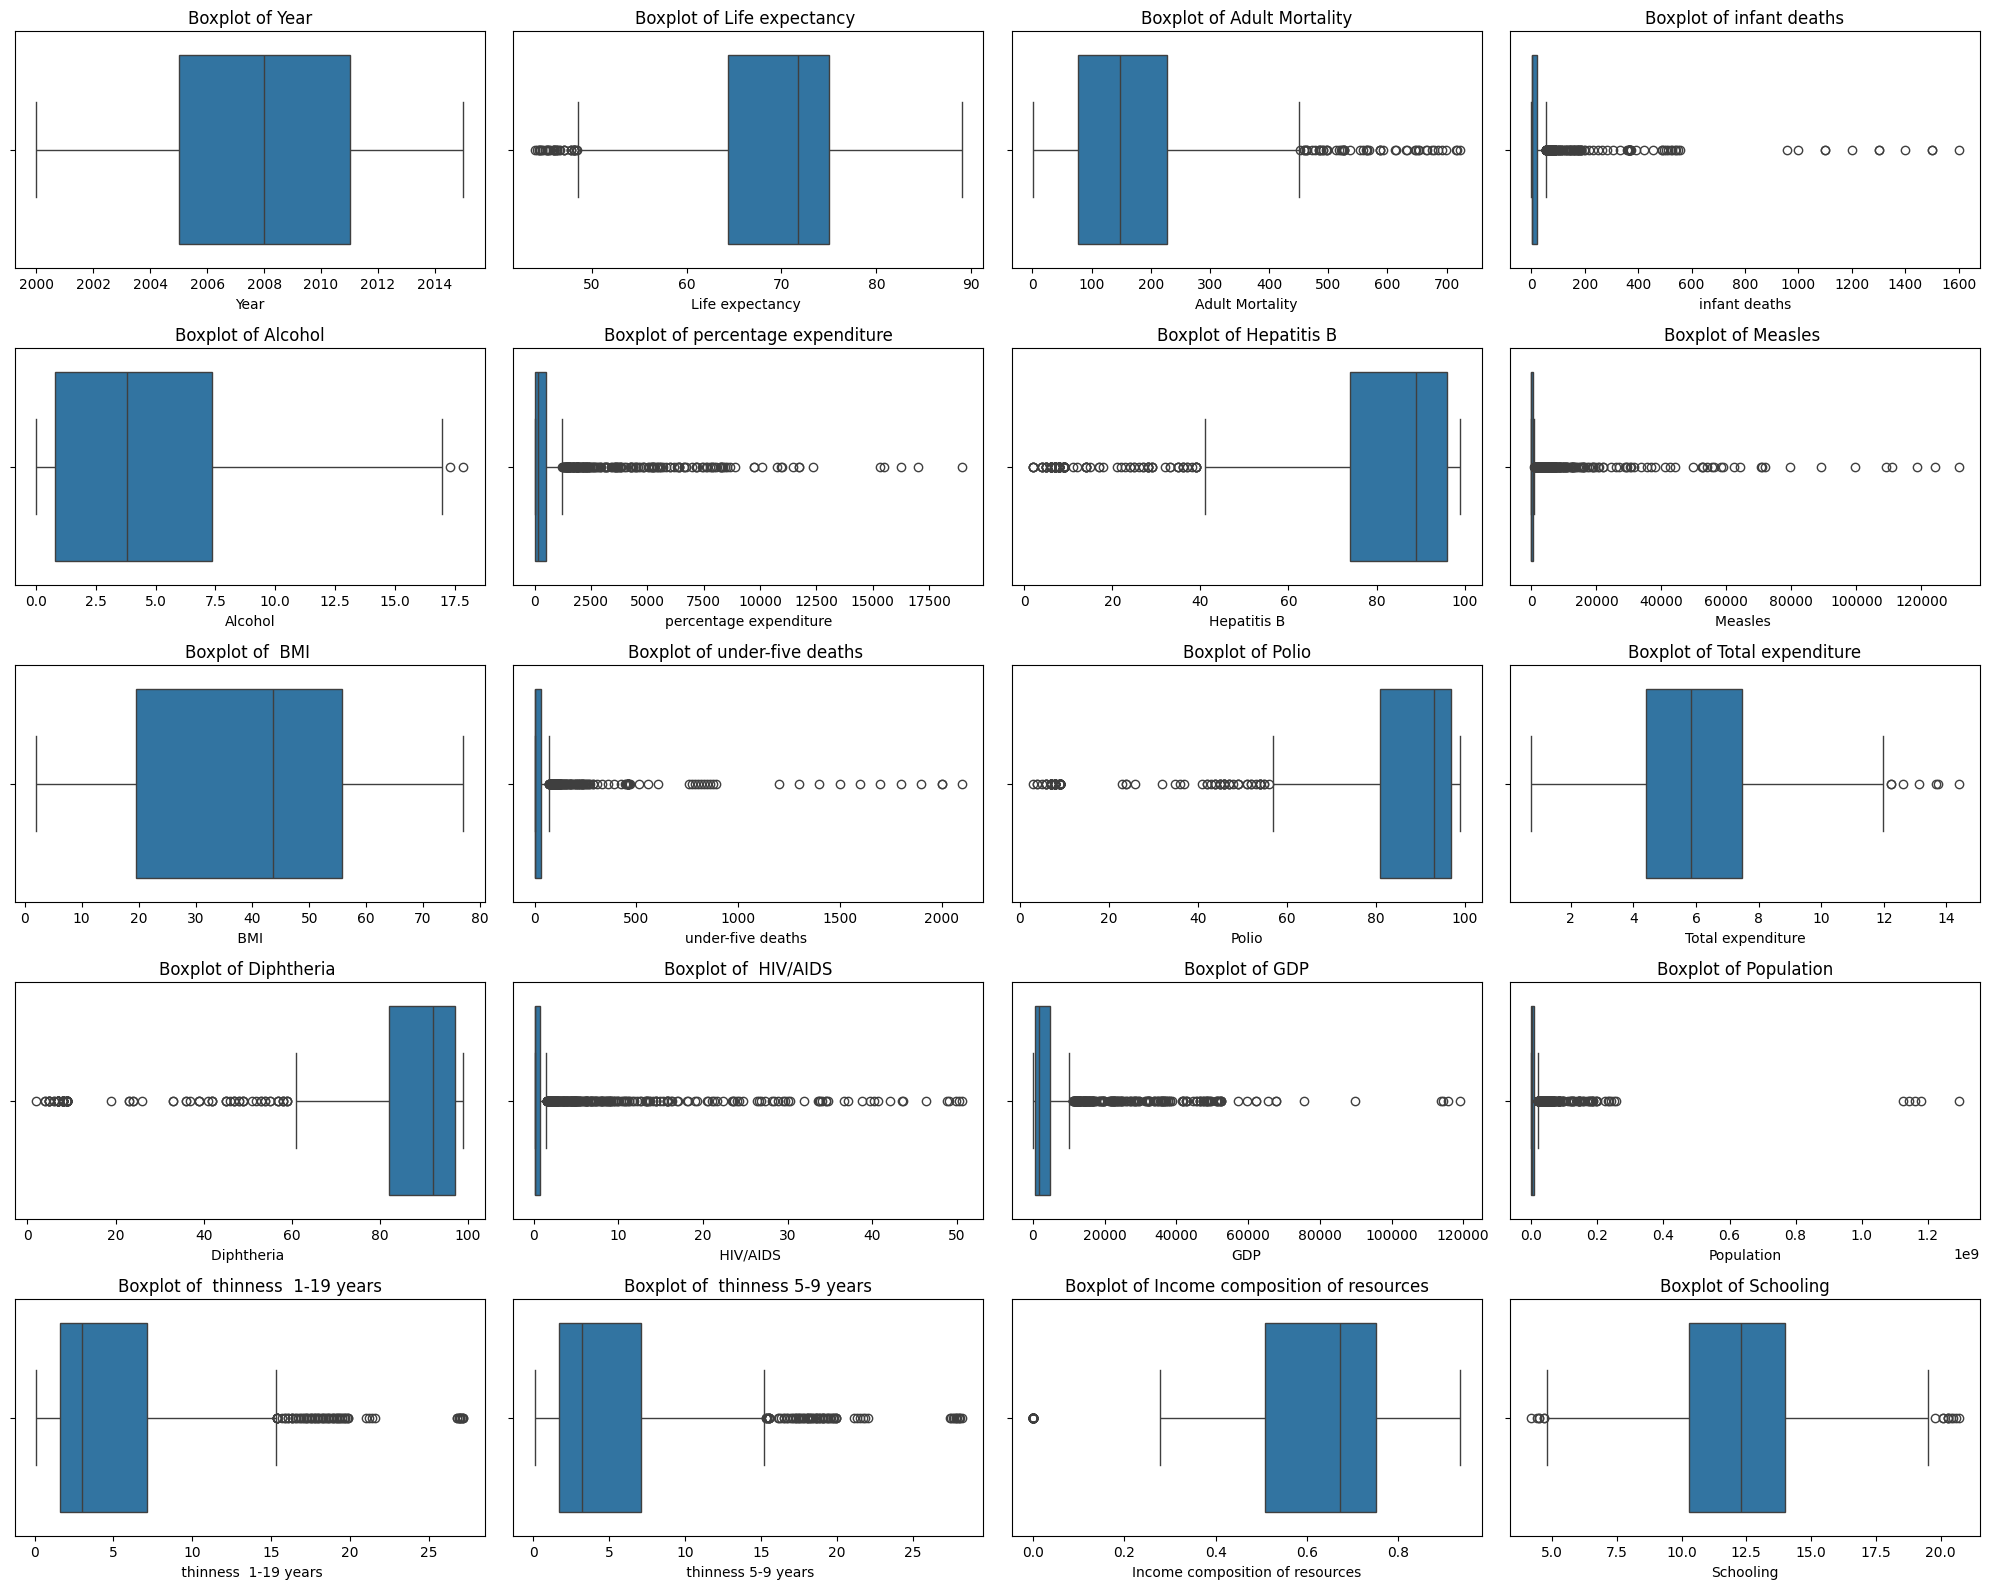

In [17]:
#plot boxplot to examine columns for outliers
columns = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16))
axes = axes.flatten()

for col, ax in zip(columns, axes):
    sns.boxplot(df, x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    plt.tight_layout()

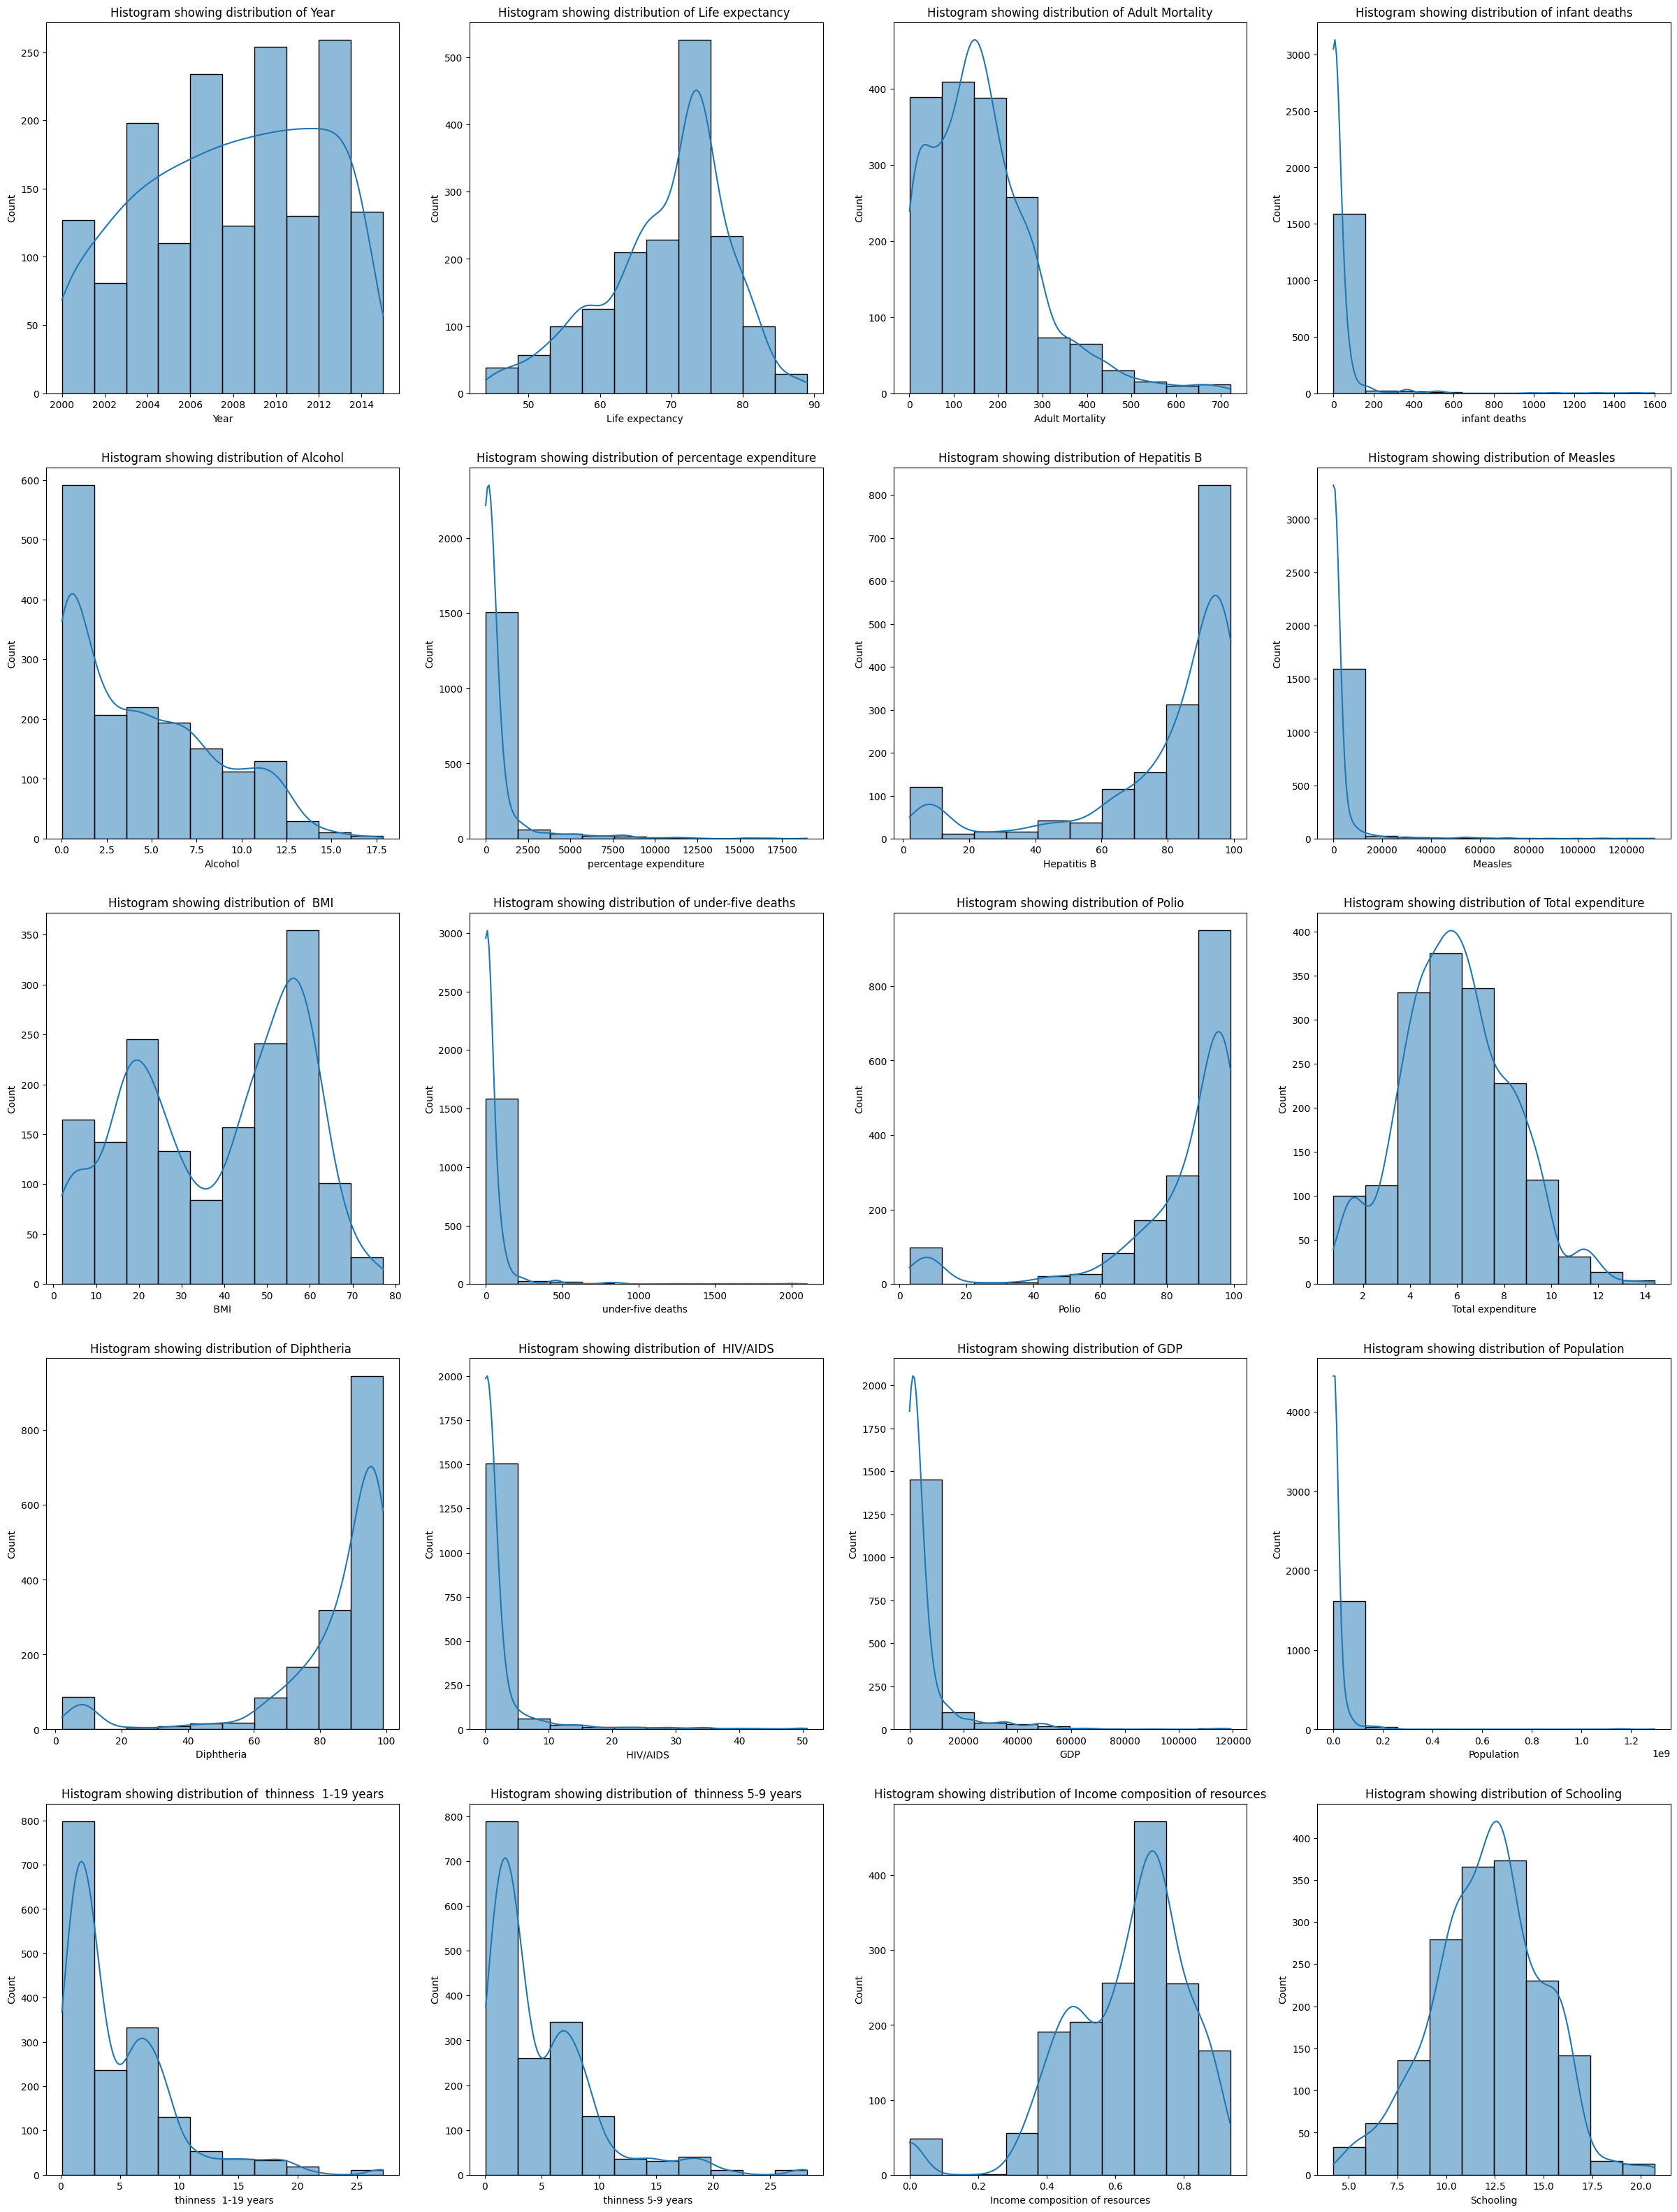

In [18]:

#plot histogram to show the distribution of numerical columns
columns = ['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

fig, axs = plt.subplots(5,4, figsize=(30,40))
axs = axs.flatten()

for col, ax in zip(columns, axs):
    sns.histplot(df, x=df[col], bins =10, kde = True, ax=ax)
    ax.set_title(f'Histogram showing distribution of {col}')

In [19]:
#examine numerical columns for skewness
df.select_dtypes(np.number).skew()

Year                               -0.200171
Life expectancy                    -0.628758
Adult Mortality                     1.276429
infant deaths                       8.477369
Alcohol                             0.662518
percentage expenditure              4.980574
Hepatitis B                        -1.793377
Measles                             7.957838
 BMI                               -0.233601
under-five deaths                   8.340863
Polio                              -2.360177
Total expenditure                   0.213362
Diphtheria                         -2.487492
 HIV/AIDS                           4.974176
GDP                                 4.517297
Population                         14.186299
 thinness  1-19 years               1.821074
 thinness 5-9 years                 1.866980
Income composition of resources    -1.155244
Schooling                          -0.128164
dtype: float64

In [20]:
#correlation matrix of numerical columns
corr_matrix = df.select_dtypes(np.number).corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


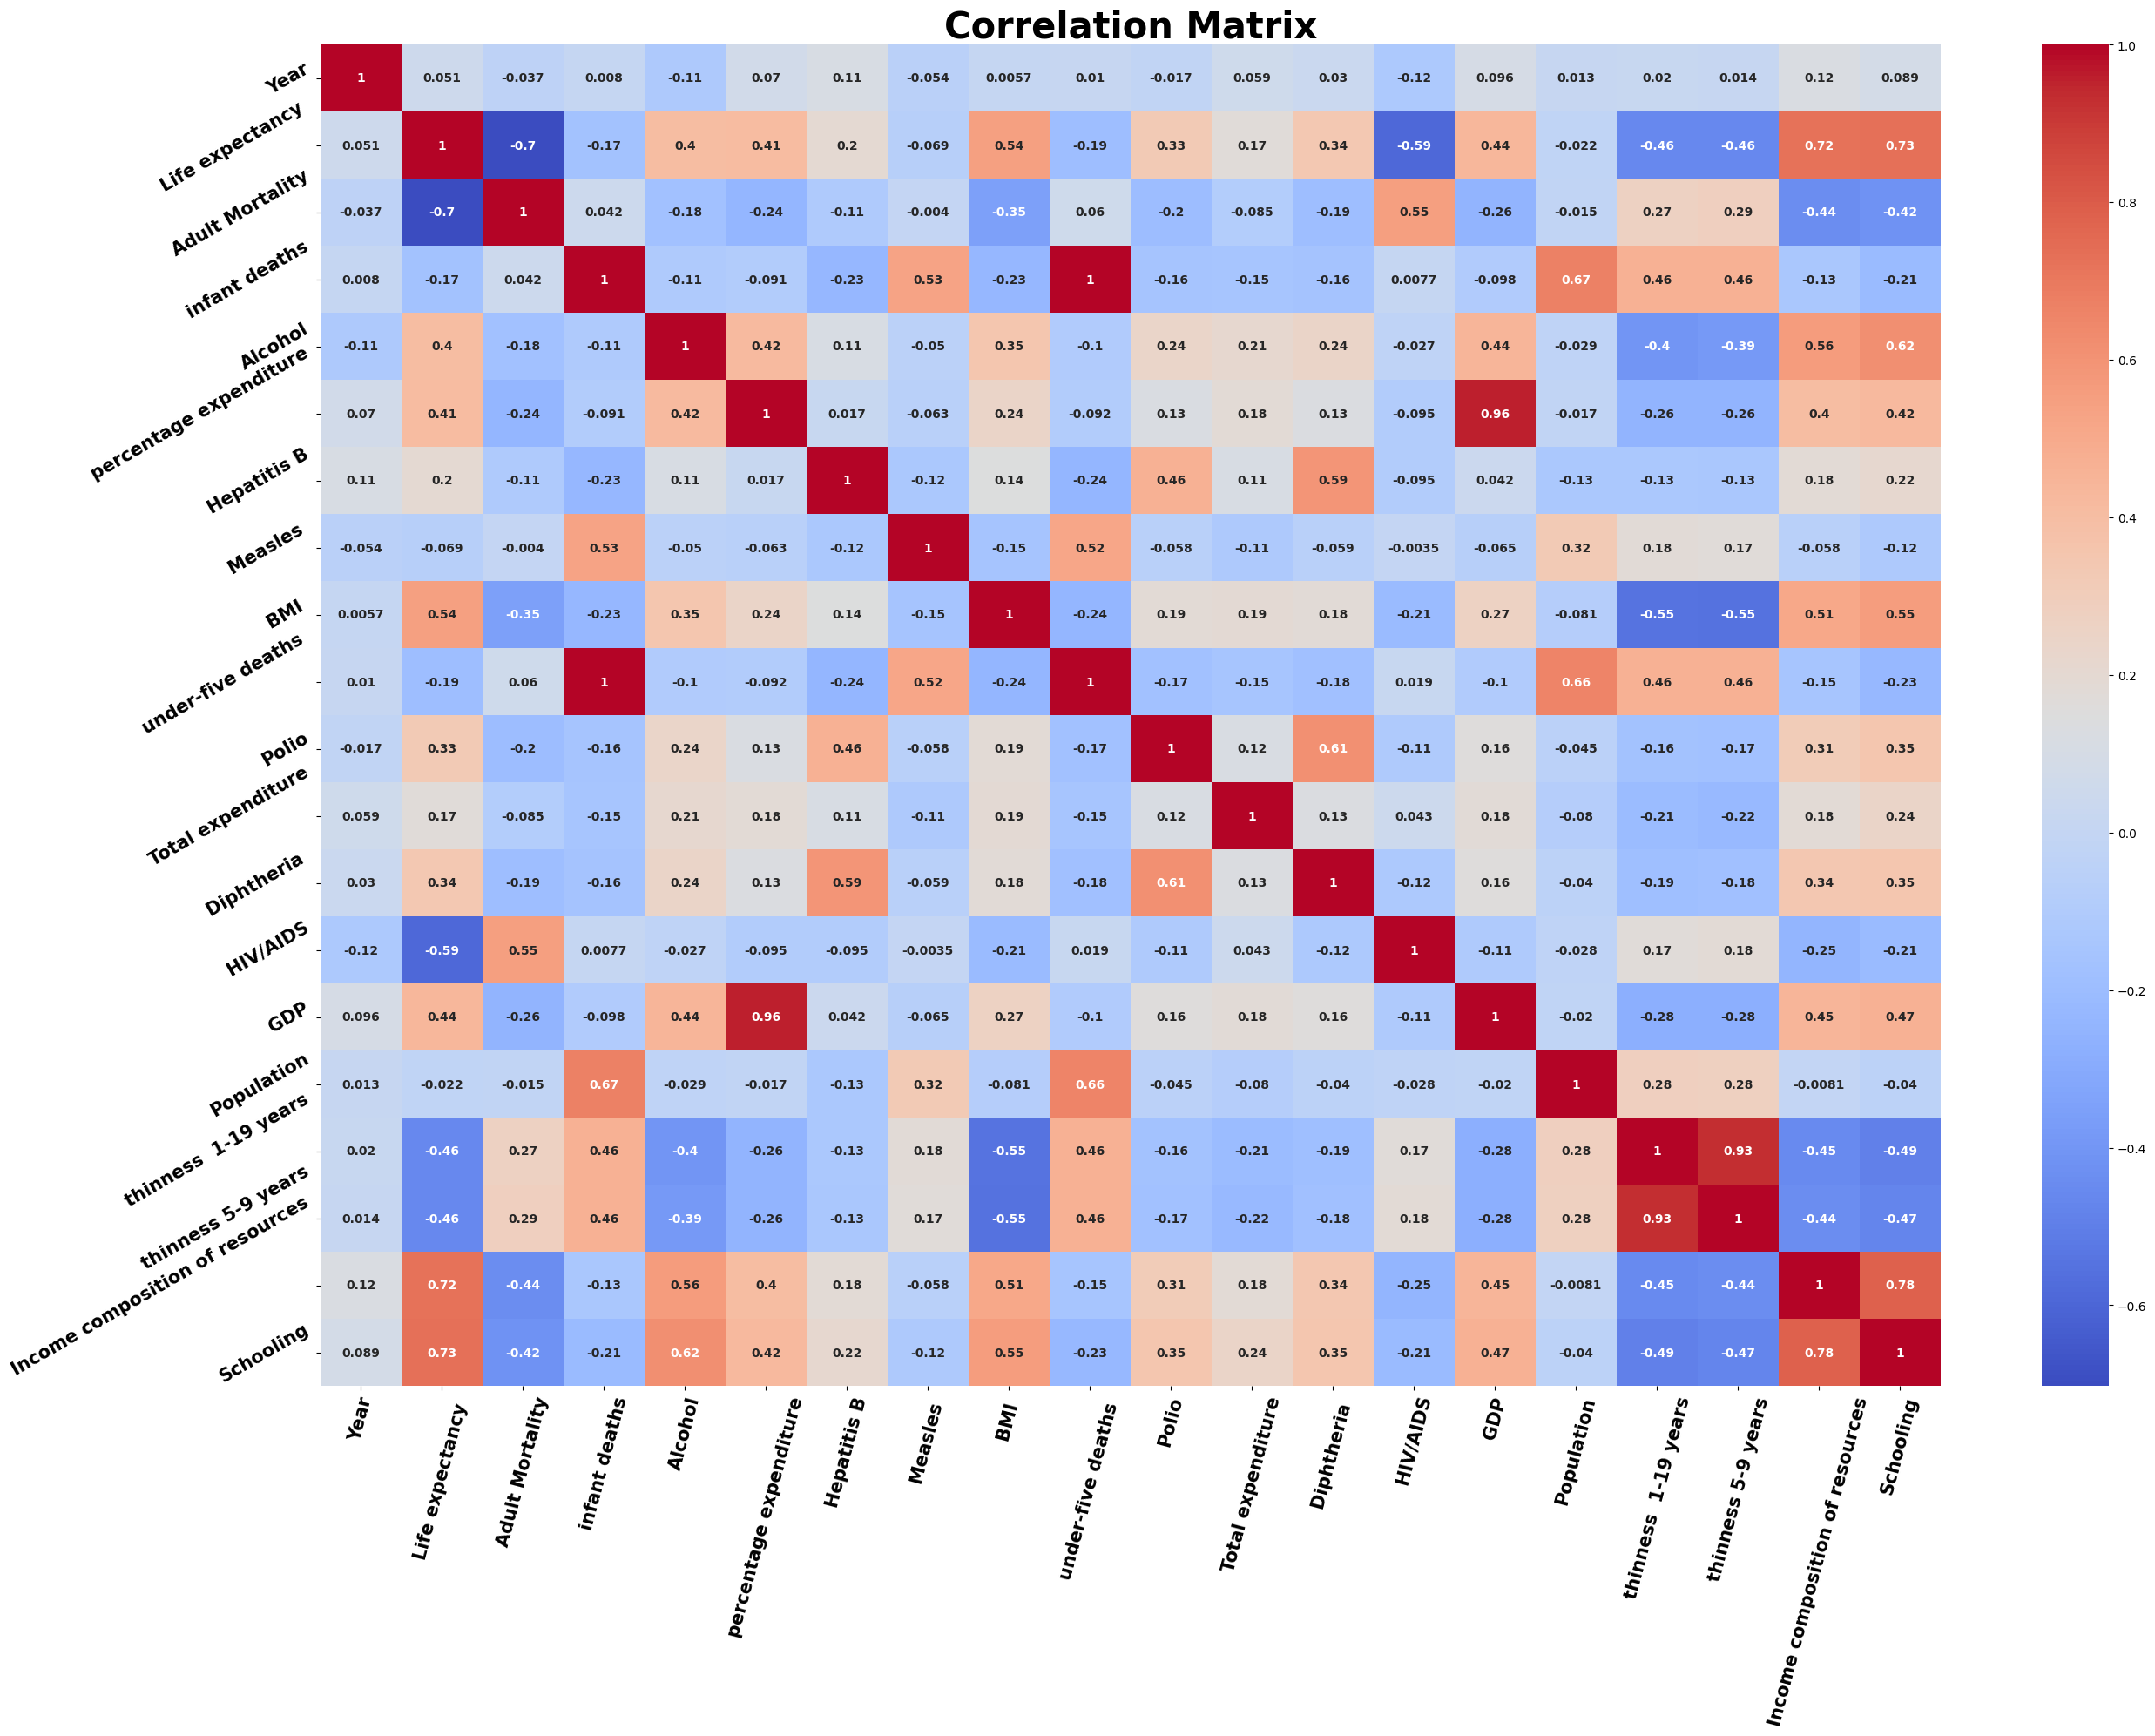

In [21]:
plt.figure(figsize=(30,20))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws ={'fontweight':'bold'})
plt.title('Correlation Matrix', fontsize = 30, fontweight = 'bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15, fontweight = 'bold',  rotation=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75, fontweight = 'bold', fontsize = 15)
plt.show()

In [22]:

#correlation matrix of life expectanc sorted in descending orders
corr_matrix['Life expectancy '].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
 BMI                               0.542042
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.022305
Measles                           -0.068881
infant deaths                     -0.169074
under-five deaths                 -0.192265
 thinness 5-9 years               -0.457508
 thinness  1-19 years             -0.457838
 HIV/AIDS                         -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy , dtype: float64

In [23]:
#pairplot showing numerical columns
sns.pairplot(df.select_dtypes(np.number))

Output hidden; open in https://colab.research.google.com to view.

In [24]:
#exploring categorical columns
cat_columns = ['Status', 'Country']
df[cat_columns].describe()

,Status,Country
count,1649,1649
unique,2,133
top,Developing,Afghanistan
freq,1407,16


In [25]:
#determining unique values
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [26]:
#detrmining the frequency of each observation in status
df['Status'].value_counts()

Status
Developing    1407
Developed      242
Name: count, dtype: int64

In [27]:
#creating a copy of numerical dataset
num_df = df.select_dtypes(np.number)
numeric_data = num_df.copy()

In [28]:
#checking the top 5 rows of the numerical dataset
numeric_data.head(5)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
#dropping unnecessary columns
country_group = df.drop(columns=['Status','Year'])

In [30]:
country_group.head(5)

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,65.0,263,62,0.01,71.279624,65,1154,19.1,83,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,59.9,271,64,0.01,73.523582,62,492,18.6,86,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,59.9,268,66,0.01,73.219243,64,430,18.1,89,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,59.5,272,69,0.01,78.184215,67,2787,17.6,93,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,59.2,275,71,0.01,7.097109,68,3013,17.2,97,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
#Grouping by mean to determine the average life expectancy of each country
av_lifeex = country_group.groupby('Country').mean().sort_values(by='Life expectancy ', ascending=False)
av_lifeex.head(5)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Ireland,83.440000,55.400000,0.000000,11.266000,3792.560815,85.200000,183.800000,49.700000,0.000000,95.200000,8.222000,95.200000,0.1,32225.113914,3.767073e+06,0.300000,0.200000,0.904600,18.480000
Canada,82.233333,66.750000,2.000000,8.158333,5313.068581,26.666667,135.916667,54.266667,2.000000,84.166667,6.553333,91.666667,0.1,29568.930782,1.484493e+07,0.500000,0.433333,0.896083,15.850000
France,82.206667,72.800000,3.000000,12.404667,4001.607012,48.933333,2828.600000,51.280000,3.466667,98.266667,6.556000,98.066667,0.1,25794.803399,2.897635e+07,0.620000,0.600000,0.869000,15.873333
Italy,82.153333,54.066667,2.066667,8.266667,3132.946831,95.666667,2081.533333,55.653333,2.333333,96.333333,8.777333,94.866667,0.1,22627.158025,2.944180e+07,0.506667,0.520000,0.856533,15.906667
Spain,82.020000,64.133333,1.666667,10.024000,2488.192196,92.200000,472.200000,58.140000,1.933333,96.733333,8.536667,96.733333,0.1,16520.767343,2.521586e+07,0.600000,0.500000,0.848467,16.266667


In [32]:
av_lifeex.tail(10)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Mozambique,53.407143,230.142857,74.285714,1.275000,38.955280,72.142857,4879.000000,15.657143,107.071429,73.357143,5.959286,72.142857,11.864286,359.652185,1.325190e+07,3.792857,3.707143,0.362000,8.092857
Nigeria,52.840000,340.200000,523.700000,8.177000,122.423682,42.300000,21896.400000,20.150000,825.400000,45.600000,3.831000,43.700000,4.750000,1675.523082,5.459305e+07,8.800000,8.710000,0.490800,9.410000
Chad,52.285714,322.142857,46.000000,0.464286,44.437289,27.571429,1527.571429,17.500000,79.142857,31.857143,3.198571,27.857143,3.814286,712.233898,7.677455e+06,9.214286,9.100000,0.367000,6.800000
Central African Republic,51.416667,444.833333,16.166667,0.820000,42.604459,41.833333,273.166667,14.933333,23.500000,42.500000,3.808333,41.833333,5.733333,431.961740,3.072260e+06,8.750000,8.700000,0.356500,6.850000
Swaziland,50.820000,336.733333,2.666667,4.463333,296.639694,80.466667,52.400000,25.046667,3.733333,89.333333,7.308667,88.733333,34.666667,2100.301886,4.789959e+05,6.640000,6.800000,0.514000,10.280000
Angola,50.675000,362.750000,76.625000,7.620000,174.405789,71.000000,3925.625000,18.450000,118.750000,70.875000,3.653750,64.000000,2.450000,2935.762962,1.010785e+07,9.037500,8.925000,0.492875,9.475000
Malawi,50.261538,403.000000,36.076923,0.881538,29.771923,89.692308,9269.000000,16.953846,56.769231,90.615385,6.729231,89.692308,16.269231,241.337392,6.336524e+06,7.046154,6.923077,0.409154,10.161538
Zimbabwe,49.386667,470.800000,26.866667,4.482000,21.721890,69.466667,984.533333,24.693333,41.400000,74.800000,6.158667,74.400000,24.400000,430.465951,7.504269e+06,7.106667,7.086667,0.434600,9.793333
Lesotho,48.608333,547.166667,4.416667,1.865833,103.494167,71.583333,282.500000,24.583333,6.166667,69.500000,7.729167,77.750000,22.058333,964.833859,1.090569e+06,7.108333,6.958333,0.456667,10.791667


In [34]:
country_lifeex = av_lifeex.reset_index()
country_lifeex.head(5)

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Ireland,83.440000,55.400000,0.000000,11.266000,3792.560815,85.200000,183.800000,49.700000,0.000000,95.200000,8.222000,95.200000,0.1,32225.113914,3.767073e+06,0.300000,0.200000,0.904600,18.480000
1,Canada,82.233333,66.750000,2.000000,8.158333,5313.068581,26.666667,135.916667,54.266667,2.000000,84.166667,6.553333,91.666667,0.1,29568.930782,1.484493e+07,0.500000,0.433333,0.896083,15.850000
2,France,82.206667,72.800000,3.000000,12.404667,4001.607012,48.933333,2828.600000,51.280000,3.466667,98.266667,6.556000,98.066667,0.1,25794.803399,2.897635e+07,0.620000,0.600000,0.869000,15.873333
3,Italy,82.153333,54.066667,2.066667,8.266667,3132.946831,95.666667,2081.533333,55.653333,2.333333,96.333333,8.777333,94.866667,0.1,22627.158025,2.944180e+07,0.506667,0.520000,0.856533,15.906667
4,Spain,82.020000,64.133333,1.666667,10.024000,2488.192196,92.200000,472.200000,58.140000,1.933333,96.733333,8.536667,96.733333,0.1,16520.767343,2.521586e+07,0.600000,0.500000,0.848467,16.266667


In [35]:
#creating a datfaframe for the top 5 countries with highest average life expectancy
life_ex = country_lifeex[['Country', 'Life expectancy ']].set_index('Country').head(5)
life_ex.head(5)

,Life expectancy
Country,
Ireland,83.440000
Canada,82.233333
France,82.206667
Italy,82.153333
Spain,82.020000


Text(0.5, 1.0, 'Countries with the Highest Life Expectancy\n')

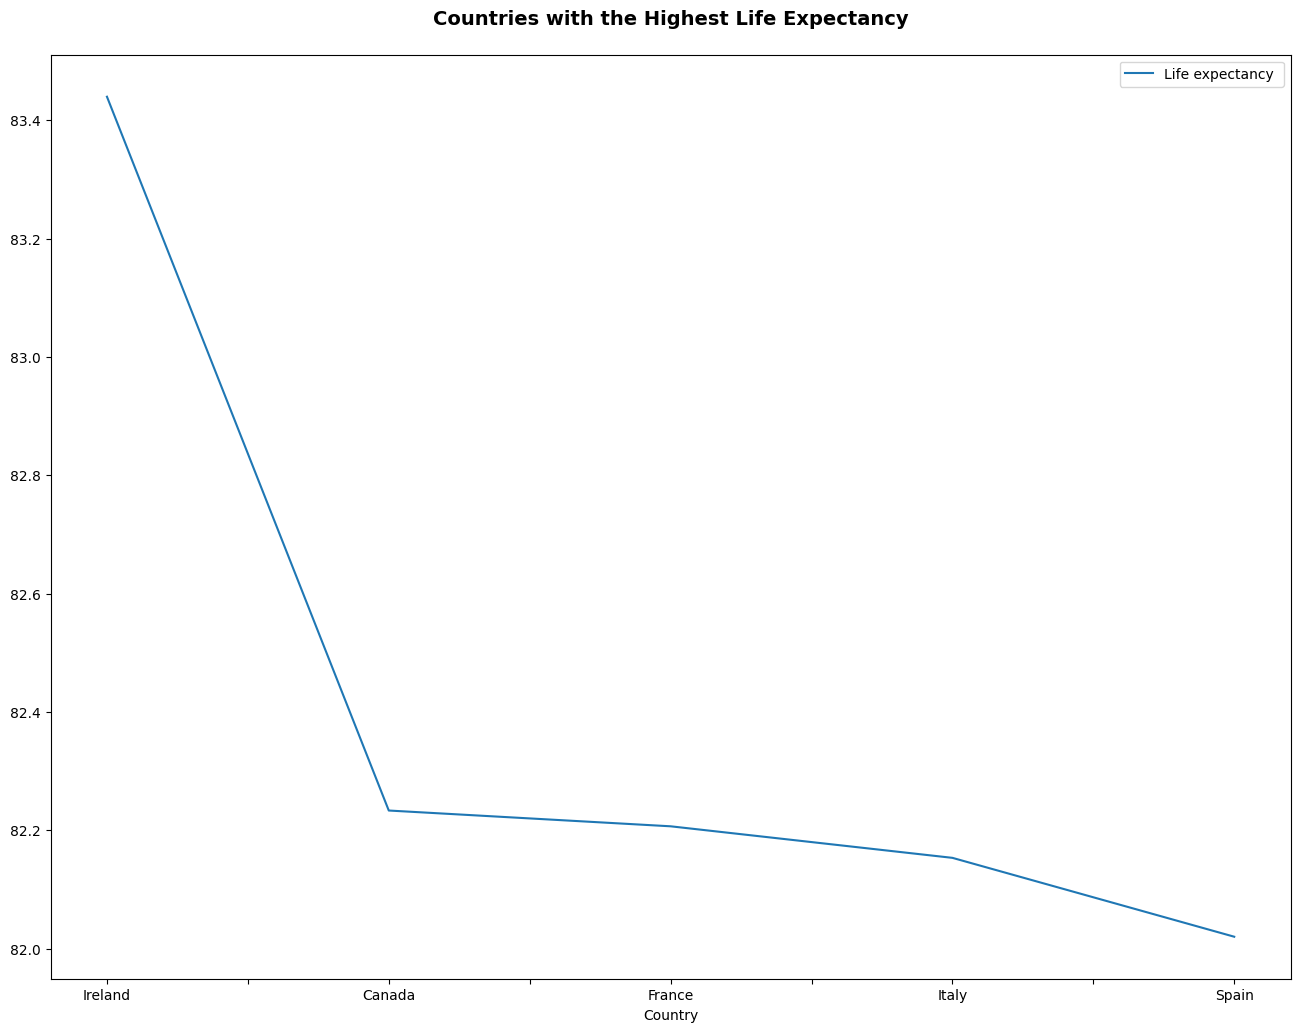

In [55]:
#countries with the highest life expectancy
life_ex.plot(kind='line', figsize =(16,12))
plt.title('Countries with the Highest Life Expectancy\n', fontsize = 14, fontweight = 'bold')

In [40]:
df['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [41]:
Nigeria_data = new_df[new_df['Country']=='Nigeria'].sort_values(by='Year', ascending=True).set_index('Country').drop(columns='Status')
Nigeria_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Nigeria,2005,49.2,4.0,556.0,9.71,6.416253,18.0,110927.0,19.3,893.0,45.0,4.11,36.0,5.4,87.893874,138939478.0,12.9,12.9,0.463,8.9
Nigeria,2006,49.8,396.0,549.0,9.66,10.357794,27.0,704.0,19.9,879.0,46.0,3.66,4.0,5.3,119.743286,14261494.0,12.6,12.6,0.466,9.0
Nigeria,2007,55.0,388.0,542.0,9.55,104.474644,42.0,2613.0,2.4,863.0,54.0,4.47,42.0,5.2,1136.829645,14641724.0,12.3,12.3,0.477,9.1
Nigeria,2008,59.0,386.0,536.0,9.30,105.591063,41.0,9960.0,21.0,848.0,6.0,4.00,53.0,5.0,1383.893354,1534739.0,12.0,11.9,0.481,9.2
Nigeria,2009,51.6,376.0,527.0,9.05,14.567647,63.0,1272.0,21.6,832.0,66.0,4.24,63.0,4.9,197.661422,15442181.0,11.7,11.6,0.487,9.3
Nigeria,2010,52.0,374.0,521.0,8.90,133.123087,49.0,8491.0,22.2,817.0,54.0,3.47,54.0,4.8,2327.326700,158578261.0,11.3,11.2,0.492,9.5
Nigeria,2011,52.3,375.0,513.0,8.75,187.573319,46.0,18843.0,22.8,802.0,48.0,3.69,48.0,4.7,2527.942300,16287776.0,11.0,1.9,0.500,9.6
Nigeria,2012,52.7,374.0,505.0,8.54,204.718626,42.0,6447.0,23.5,788.0,42.0,3.30,42.0,4.4,2755.297787,167297284.0,1.7,1.6,0.507,9.7
Nigeria,2013,53.2,367.0,498.0,8.30,194.203288,46.0,52852.0,24.1,773.0,46.0,3.70,46.0,3.9,2996.964320,17182933.0,1.4,1.2,0.514,9.8


Text(0.5, 1.0, 'Life Expectancy in Nigeria\n')

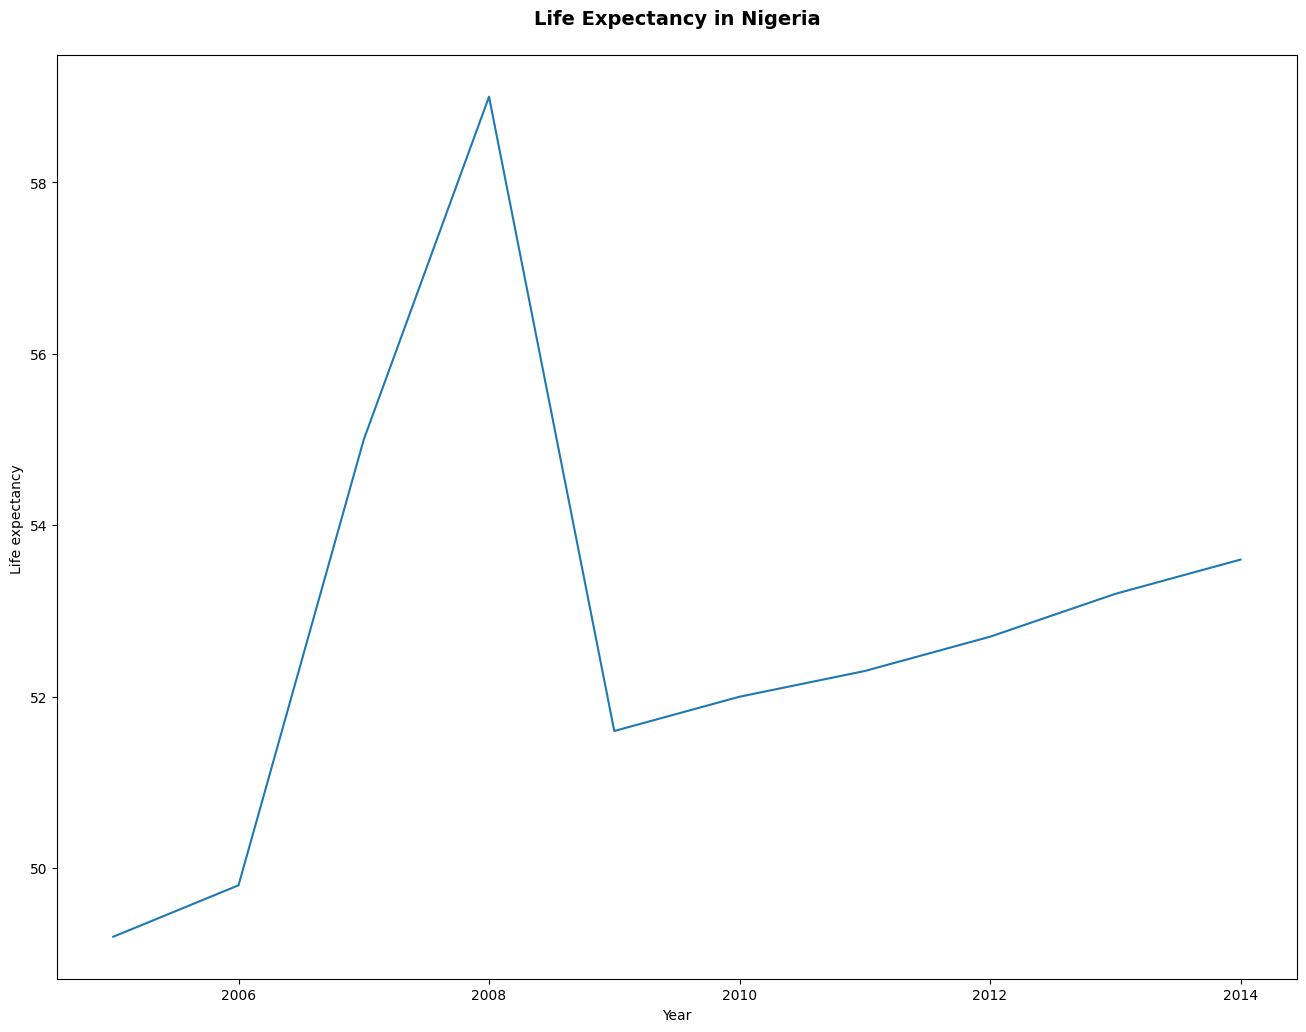

In [42]:
plt.figure(figsize=(16,12))
sns.lineplot(data=Nigeria_data, x='Year', y='Life expectancy ')
plt.title('Life Expectancy in Nigeria\n', fontsize = 14, fontweight = 'bold')